In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Config')
from lablib import LS_fit

# Prima parte

## Circuito RC

Abbiamo effettuato le misurazioni con il cursore dell'oscilloscopio. \
**Resistenza interna oscilloscopio** = 50 $\Omega$

Intrvallo tensione (0.5,-0.5) V \
Capacità = 10 nF \
resistenza = 67.1 $k\Omega$ \
frequenza = 200 Hz \
incertezza su oscilloscopio (precisione strumento) = 8 mV


In [27]:
# Primo plot dei dati
dati1 = pd.read_csv("Dati1.csv")

tempi1 = dati1["tempo(carica)[ms]"]
tens1 = dati1["tensione(carica1)[mV]"]

# plt.errorbar(tempi1, tens1, [8 for i in tens1], fmt = '.')
# plt.show()

In [28]:
# prova fit dei dati con libreria
def mod_exp(x, A, T, C):
    return A*np.exp(-x/T) + C

tempi1_µs = [i*1e-6 for i in tempi1]
tens1_mv = [i*1e-3 for i in tens1]
tens1_err = [.008 for i in tens1]

par1, val1, ers1, pval1, *other = LS_fit(tempi1_µs, tens1_mv, tens1_err, mod_exp, disp=1, A=1, T=1, C=0) # type: ignore

for p, v, e in zip(par1, val1, ers1):
    print(f"{p} = {v:.3f} ± {e:.3f}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.716 (χ²/ndof = 0.2)      │              Nfcn = 164              │
│ EDM = 2.57e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.964   │   0.006   │            │            │         │         │       │
│ 1 │ T    │ 0.652e-6  │ 0.011e-6  │            │            │         │         │       │
│ 2 │ C    │  -0.002   │   0.005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────┐
│   │             A             T             C │
├───┼───────────────────────────────────────────┤
│ A │      3.92e-05   1.36332e-12     -0.013e-3 │
│ T │   1.36332e-12      1.21e-16 -42.41813e-12 │
│ C │     -0.013e-3 -42.41813e-12      2.25e-05 │
└───┴───────────────────────────────────────────┘

A = 0.964 ± 0.006
T = 0.000 ± 0.000
C = -0.002 ± 0.005


In [29]:
QC, tau_1, c_0 = val1
R_1 = 67.1e3 # Ohm

C = tau_1/R_1
print(f"Capacità calcolata = {C:.3g}")

Capacità calcolata = 9.72e-12


## Circuito RL

induttanza ~ 10 mH \
resistenza = 1 $\text{k}\Omega$ \
frequenza = 700 Hz \
range di tensione = (-1,1) V \
precisione oscilloscopio = 20 mV

In [30]:
# plot dei dati

dati2 = pd.read_csv("Dati2.csv")
tempi2 = dati2["tempo[ms]"]
tens2 = dati2["tensione[mV](carica)"]

# plt.errorbar(tempi2, tens2, [20 for i in tens2])
# plt.show()

In [31]:
# Fit circuito RL

tempi2_ms = [i*1e-3 for i in tempi2]
tens2_mv = [i*1e-3 for i in tens2]
tens2_err = [.02 for i in tens2]

par2, val2, ers2, pval2, *other2 = LS_fit(tempi2_ms, tens2_mv, tens2_err, mod_exp, A=1, T=1, C=1)

for p, v, e in zip(par2, val2, ers2):
    print(f"{p} = {v:.3g} ± {e:.3g}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.82 (χ²/ndof = 1.0)      │              Nfcn = 213              │
│ EDM = 9.66e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │  -1.873   │   0.016   │            │            │         │         │       │
│ 1 │ T    │  52.2e-6  │  1.1e-6   │            │            │         │         │       │
│ 2 │ C    │   0.967   │   0.010   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         A         T         C │
├───┼───────────────────────────────┤
│ A │  0.000248 1.7845e-9  -0.05e-3 │
│ T │ 1.7845e-9  1.14e-12 8.3428e-9 │
│ C │  -0.05e-3 8.3428e-9  9.92e-05 │
└───┴───────────────────────────────┘

A = -1.87 ± 0.0158
T = 5.22e-05 ± 1.07e-06
C = 0.967 ± 0.00996


In [32]:
Va, tau_2, c_1 = val2
R_2 = 1e3 # ohm

L = R_2 * tau_2
print(f"Induttanza misurata = {L:.3g}")

Induttanza misurata = 0.0522


 # Seconda parte

## Circuito RLC

Resistenza = 300 $\Omega$ \
Induttanza e capacità uguali a prima \
Intervallo tensione (1,0)

Abbiamo stimato le costanti del sistema prima di prendere i dati:
* $\omega_0$ = 100 kHz
* $f_0 = \frac{\omega_0}{2\pi}$ = 16kHz 

Ci siamo resi presto conto che questi risultati sono insensati \
Frequenza effettivamente usata = 300 Hz


Per smorzamento critico abbiamo usato Resistenza = 3900 $\Omega$ \
Per sovrasmorzamento abbiamo usato Resistenza = 10.000 $\Omega$

### Caso sottosmorzato

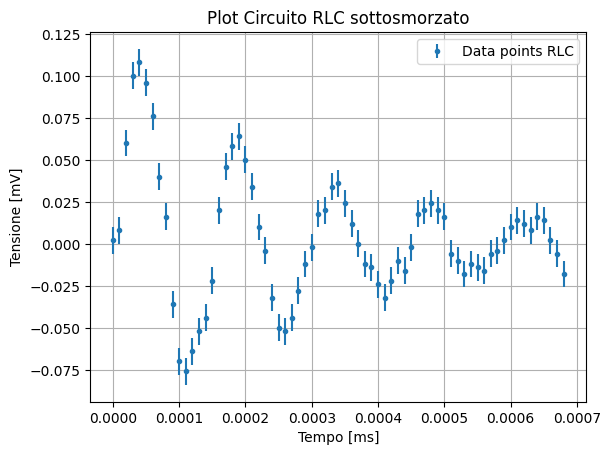

In [33]:
#plot dati RLC sottosmorzato

dati3 = pd.read_csv("Dati3.csv")
tempo3=dati3["tempo[ms]"]
tensione3=dati3["tensione[mV]"]

tempo3_ms = [i*1e-3 for i in tempo3]
tensione3_mv = [i*1e-3 for i in tensione3]

tens3_err = [.008 for i in tensione3]

plt.errorbar(tempo3_ms,tensione3_mv,tens3_err, fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC sottosmorzato")
plt.xlabel("Tempo [ms]")
plt.ylabel("Tensione [mV]")
plt.legend()
plt.grid()
plt.show()

In [37]:
# fit dei dati nel caso sottosmorzato

R_3 = R_1
C_3 = C
V_0 = 1
L_3 = L

K1 = R_3 * C_3 * V_0
omega_0_calc = 1/np.sqrt(L_3*C_3)
gamma_calc_1 = R_3/(2*L_3)
omega_calc_1 = np.sqrt(gamma_calc_1**2 + omega_0_calc**2)

def mod_ssm(x, gamma, omega):
    return K1*v * np.exp(-gamma*x)*(gamma*np.cos(omega*x) + omega*np.sin(omega*x))

par3, val3, ers3, pval3, *other3 = LS_fit(tempo3_ms, tensione3_mv, tens3_err, mod_ssm, gamma = gamma_calc_1, omega = omega_calc_1)

for p, v, e in zip(par3, val3, ers3):
    print(f"{p} = {v:.3g} ± {e:.3g}")

C:\Users\Francesco\AppData\Local\Temp\ipykernel_19884\1511588059.py:14: RuntimeWarning: overflow encountered in exp
  return K1*v * np.exp(-gamma*x)*(gamma*np.cos(omega*x) + omega*np.sin(omega*x))
c:\Users\Francesco\AppData\Local\Programs\Python\Python311\Lib\site-packages\iminuit\cost.py:130: RuntimeWarning: overflow encountered in multiply
  return z * z


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1481 (χ²/ndof = 22.1)      │              Nfcn = 275              │
│ EDM = 6.26e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ gamma │ 13.7438e3 │ 0.0020e3  │            │            │         │         │       │
│ 1 │ omega │1.2970921e6│0.0000020e6│            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────┐
│       │ gamma omega │
├───────┼─────────────┤
│ gamma │     4    -0 │
│ omega │    -0     4 │
└───────┴─────────────┘

gamma = 1.37e+04 ± 2
omega = 1.3e+06 ± 2


### Caso Smorzamento Critico 

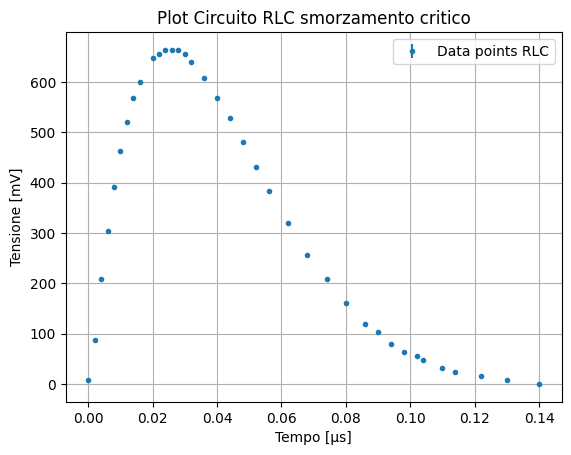

In [35]:
#plot dati RLC sottosmorzato
#resistenza usata R = 3900 omh

Dati3 = pd.read_csv("Dati3.csv")
tempo4 = Dati3["tempo2[ms]"]
tensione4 = Dati3["tensione2[mV]"]


plt.errorbar(tempo4,tensione4,[2 for i in tensione4], fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC smorzamento critico")
plt.xlabel("Tempo [µs]")
plt.ylabel("Tensione [mV]")
plt.legend()
plt.grid()
plt.show()

### Caso sovrasmorzato

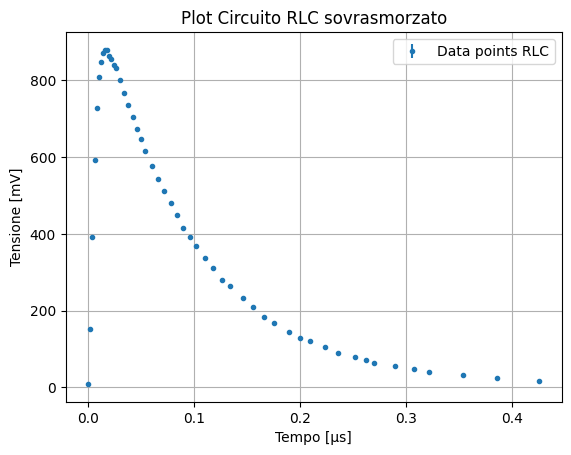

In [36]:
#plot dati RLC sovrasmorzato 
#resistenza utilizzato R= 10.000 ohm 

Dati5 = pd.read_csv("Dati3.csv")
tempo5= Dati5["tempo3[ms]"]
tensione5= Dati5["tensione3[mV]"]


plt.errorbar(tempo5,tensione5,[2 for i in tensione5], fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC sovrasmorzato")
plt.xlabel("Tempo [µs]")
plt.ylabel("Tensione [mV]")
plt.legend()
plt.grid()
plt.show()

